Шаг 1. Загрузка данных, изучение полей и уникальных значений для каждого поля
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [98]:
for key in df.keys():
    print(key)

age
workclass
fnlwgt
education
educational-num
marital-status
occupation
relationship
race
gender
capital-gain
capital-loss
hours-per-week
native-country
income


In [159]:
# df.workclass.unique()
# df.education.unique()
# df["marital-status"].unique()
# df.occupation.unique()
# df.relationship.unique()
# df.race.unique()
# df.race.value_counts()
# df.gender.unique()
# df["native-country"].unique()
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Шаг 2. Поиск пропущенных значений и их исключение из датасета
Как альтернативный вариант исключению можно ввести дополнительную категорию - Unknown

In [109]:
df = df.replace('?', np.NaN)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [110]:
df = df[~(df['workclass'].isna())]
df = df[~(df['occupation'].isna())]
df = df[~(df['native-country'].isna())]
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Шаг 3. Реклассификация или объединение в более крупные группы
Например, в поле marital-status есть пересекающиеся понятия, различия которых в данном исследовании можно проигнорировать

In [112]:
# marital-status - Married, Non-Married
# race - Black, White, Other
# workclass - Private, Government, Self-employed, Non-employed
# education - 0,1,2,3,4,5,6
# countries - North America, Latin America, Asia, Europe

df['married_status'] = np.where(df['marital-status'].isin(['Never-married','Widowed','Divorced','Separated']), 0, 1)

df['workclass_status'] = np.where(df['workclass'] == 'Private', 'private',
                   np.where(df['workclass'].isin(['Local-gov', 'Federal-gov', 'State-gov']), 'government',
                   np.where(df['workclass'].isin(['Self-emp-not-inc', 'Self-emp-inc']), 'self-employed', 'non-employed')))
df['race_status'] = np.where(df['race'].isin(['Asian-Pac-Islander', 'Other','Amer-Indian-Eskimo']), 'other', df['race'])

df['education_status'] = np.where(df['educational-num'] < 10, 0,
                   np.where(df['educational-num'] == 10, 1,
                   np.where(df['educational-num'].isin([11,12]) , 2,
                    np.where(df['educational-num'] == 13, 3,
                             np.where(df['educational-num'] == 14, 4,
                                      np.where(df['educational-num'] == 15, 5, 6))))))

north_america = ['United-States','Canada']
latin_america = ['Jamaica','Haiti','Ecuador','Columbia','Dominican-Republic','Mexico','El-Salvador','Puerto-Rico','Nicaragua','Honduras','Cuba','Peru','Guatemala','Trinadad&Tobago','Outlying-US(Guam-USVI-etc)']
europe = ['England','Scotland','Italy','Portugal','Yugoslavia','Hungary','Ireland','Germany','Greece','France','Holand-Netherlands','Poland']
asia = ['Philippines','Thailand','Vietnam','Japan', 'India', 'Cambodia','Laos','Taiwan','China', 'Iran',]

df['country_status'] = np.where(df['native-country'].isin(north_america), 'north america',
                   np.where(df['native-country'].isin(latin_america), 'latin america',
                   np.where(df['native-country'].isin(europe), 'europe',
                    np.where(df['native-country'].isin(asia), 'asia','unknown'))))
df = df[~(df['country_status'] == "unknown")]

In [114]:
df = df[['age','workclass_status','education_status','married_status','occupation','race_status','gender','hours-per-week','country_status','income']]
df

,age,workclass_status,education_status,married_status,occupation,race_status,gender,hours-per-week,country_status,income
0,25,private,0,0,Machine-op-inspct,Black,Male,40,north america,<=50K
1,38,private,0,1,Farming-fishing,White,Male,50,north america,<=50K
2,28,government,2,1,Protective-serv,White,Male,40,north america,>50K
3,44,private,1,1,Machine-op-inspct,Black,Male,40,north america,>50K
5,34,private,0,0,Other-service,White,Male,30,north america,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,private,2,1,Tech-support,White,Female,38,north america,<=50K
48838,40,private,0,1,Machine-op-inspct,White,Male,40,north america,>50K
48839,58,private,0,0,Adm-clerical,White,Female,40,north america,<=50K
48840,22,private,0,0,Adm-clerical,White,Male,20,north america,<=50K


Шаг 4. Построение график и изучения распределений в датасете
В примерах приведено распределение по доходам среди возрастов и по количеству часов рабочего времени в неделю
На основании графиков можно сделать вывод, что в абсолютном выражении количество людей с доходами выше 50К в год в возрасте от 30 до 50 лет, большинство работает 40+ часов в неделю


In [115]:
import matplotlib.pyplot as plt
import numpy as np

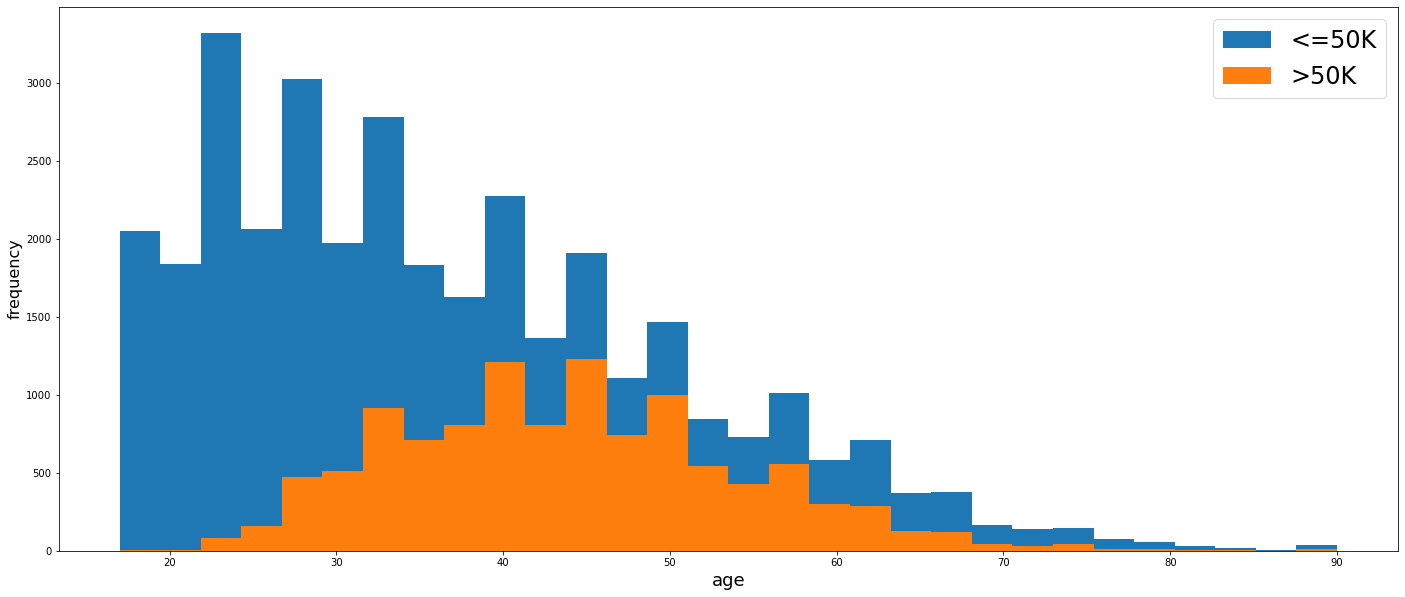

In [157]:
df.pivot(columns="income", values="age").plot.hist(bins=30)
plt.xlabel('age', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.legend(loc=1, prop={'size': 24})
plt.show()

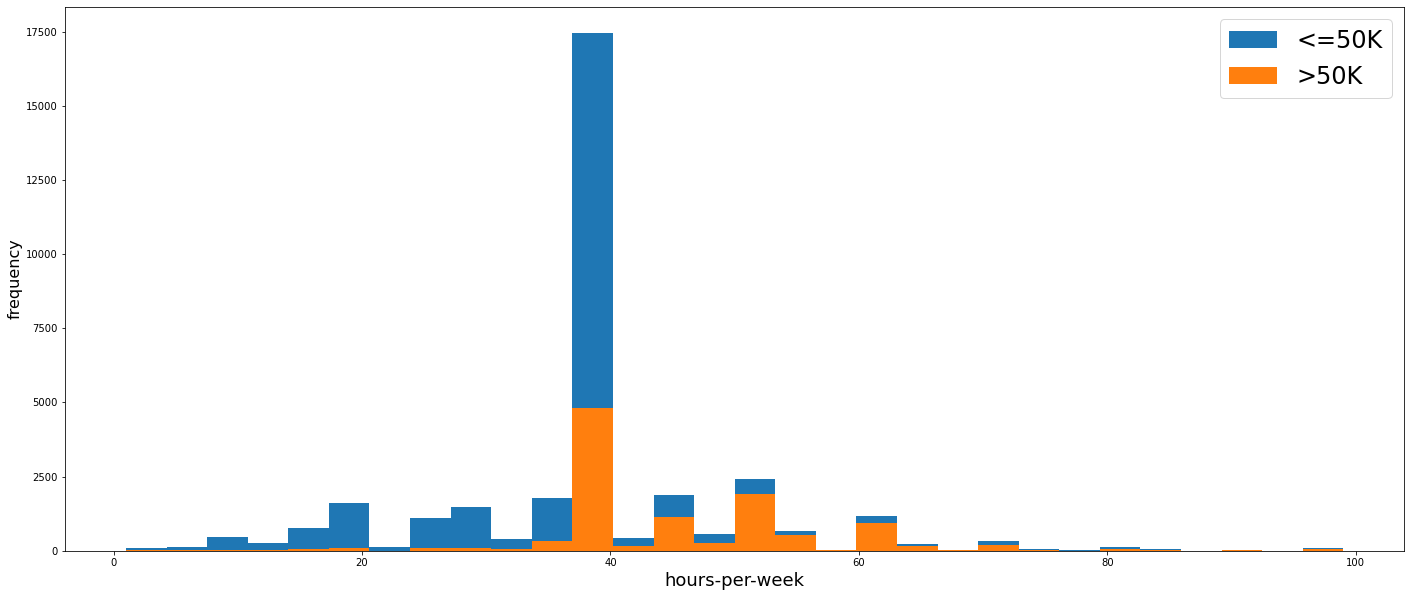

In [158]:
df.pivot(columns="income", values="hours-per-week").plot.hist(bins=30)
plt.xlabel('hours-per-week', fontsize=18)
plt.ylabel('frequency', fontsize=16)
plt.legend(loc=1, prop={'size': 24})
plt.show()

Шаг 5. Перевод категориальных признаков в числовые

In [133]:
df['workclass_status_num'] = df['workclass_status'].map({'private': 0, 'government': 1, 'self-employed': 2, 'non-employed': 3}).astype(int)
df['occupation_num'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
df['race_status_num'] = df['race_status'].map({'White': 0, 'Black': 1, 'other': 2}).astype(int)
df['gender_num'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)
df['country_status_num'] = df['country_status'].map({'north america': 0, 'latin america': 1, 'europe': 2, 'asia': 3}).astype(int)
df['income_num'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)

Шаг 6. Подготовка исходного и целевого датасета для построения модели регрессии

In [143]:
X = df[['age','workclass_status_num','education_status','married_status','occupation_num','race_status_num','gender_num','hours-per-week','country_status_num']]
y = pd.Series(data=df['income_num'])
X

,age,workclass_status_num,education_status,married_status,occupation_num,race_status_num,gender_num,hours-per-week,country_status_num
0,25,0,0,0,6,1,0,40,0
1,38,0,0,1,1,0,0,50,0
2,28,1,2,1,14,0,0,40,0
3,44,0,1,1,6,1,0,40,0
5,34,0,0,0,13,0,0,30,0
...,...,...,...,...,...,...,...,...,...
48837,27,0,2,1,2,0,1,38,0
48838,40,0,0,1,6,0,0,40,0
48839,58,0,0,0,3,0,1,40,0
48840,22,0,0,0,3,0,0,20,0


Шаг 7. Применение модели логистической регрессии с разделением выборки на обучающее и тестовое подмножество в соотношении 80:20

In [134]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [142]:
predictions[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [138]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [139]:
model.predict_proba(X_test)

array([[0.7678977 , 0.2321023 ],
       [0.96555134, 0.03444866],
       [0.34705503, 0.65294497],
       ...,
       [0.98339651, 0.01660349],
       [0.73244478, 0.26755522],
       [0.93428087, 0.06571913]])

Точность предсказания модели логистической регрессии

In [140]:
model.score(X_train, y_train) 

0.8143538282419471

In [141]:
model.score(X_test, y_test)

0.8211553387293492

Шаг 8. Применение модели модели опорных векторов (SVC)

In [144]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Точность предсказания модели опорных векторов (SVC)

In [145]:
clf.score(X_train, y_train)

0.8263292121749737

In [146]:
clf.score(X_test, y_test)

0.828029715046014

Вывод: оба метода - логистическая регрессия и метод опорных векторов - показали высокие значения точности построенных моделей на уровне 80%, при этом последний оказался незначительно точнее.